In [1]:
library(ggplot2)
library(tidyr)

In [2]:
# Definir la matriz de transición
P <- matrix(c(0.7, 0.2, 0.1, 
              0.3, 0.4, 0.3, 
              0.1, 0.3, 0.6), 
            nrow = 3, byrow = TRUE)

In [3]:
# Nombres de los estados
states <- c("Saludable", "Enfermo", "Recuperado")

In [4]:
# Definir el estado inicial (por ejemplo, comenzamos en "Saludable")
initial_state <- c(1, 0, 0)  # 100% probabilidad de comenzar en "Saludable"

In [5]:
# Crear un dataframe para almacenar las probabilidades de cada estado a lo largo del tiempo
probabilities <- data.frame(
  Dia = 0:10,
  Saludable = numeric(11),
  Enfermo = numeric(11),
  Recuperado = numeric(11)
)

In [6]:
# Asignar las probabilidades iniciales
probabilities[1, 2:4] <- initial_state

In [7]:
# Calcular las probabilidades para cada día
for (dia in 1:10) {
  initial_state <- initial_state %*% P
  probabilities[dia + 1, 2:4] <- initial_state
}

In [8]:
# Mostrar las probabilidades de estados a lo largo de 10 días
print("Probabilidades de estados a lo largo de 10 días:")
print(probabilities)

[1] "Probabilidades de estados a lo largo de 10 días:"
   Dia Saludable   Enfermo Recuperado
1    0 1.0000000 0.0000000  0.0000000
2    1 0.7000000 0.2000000  0.1000000
3    2 0.5600000 0.2500000  0.1900000
4    3 0.4860000 0.2690000  0.2450000
5    4 0.4454000 0.2783000  0.2763000
6    5 0.4229000 0.2832900  0.2938100
7    6 0.4103980 0.2860390  0.3035630
8    7 0.4034466 0.2875641  0.3089893
9    8 0.3995808 0.2884117  0.3120075
10   9 0.3974308 0.2888831  0.3136861
11  10 0.3962351 0.2891452  0.3146197


In [9]:
# Convertir el dataframe a formato largo para ggplot2
probabilities_long <- pivot_longer(probabilities, cols = -Dia, names_to = "Estado", values_to = "Probabilidad")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


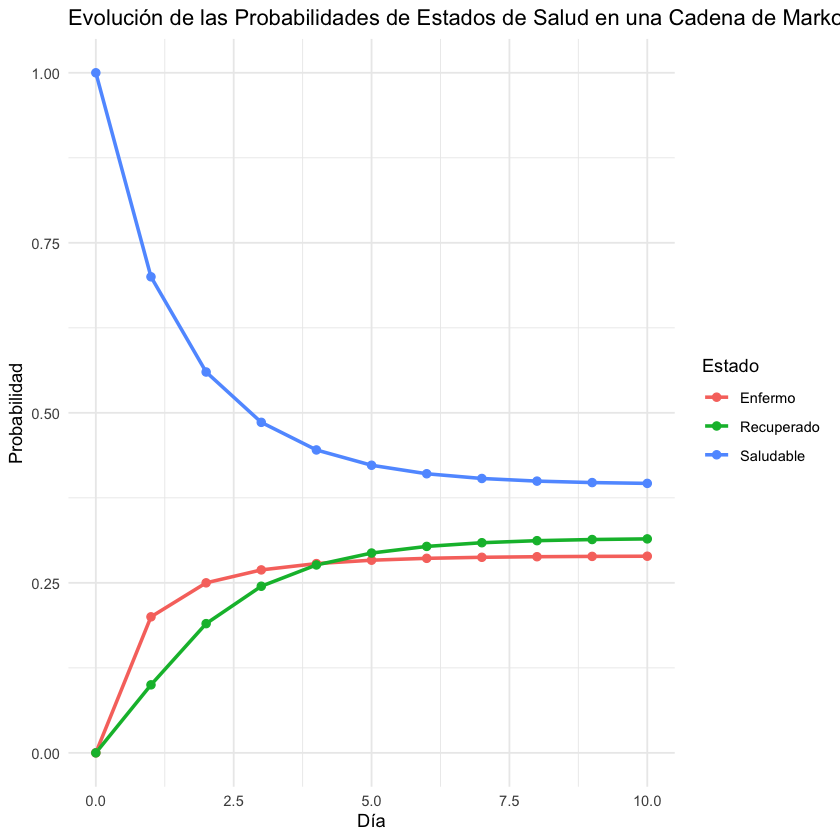

In [10]:
# Crear la gráfica
ggplot(data = probabilities_long, aes(x = Dia, y = Probabilidad, color = Estado)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Evolución de las Probabilidades de Estados de Salud en una Cadena de Markov",
       x = "Día",
       y = "Probabilidad",
       color = "Estado") +
  theme_minimal()